# Assignment 1: Deep learning with VGG16 {-}

Name: Nguyen Hoang An
ID: 200011

This assignment aims at familiarizing you with training and testing VGG16 neural network. Here are the BASIC requirements of the assignment:

- Load the data.
- Process, normalize and resize the images.
- Build VGG16 model to perform an image classification task.
- Evaluate the performance of the model.

The dataset you will be working on is MNIST dataset. This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

### Reference {-}:
- Simonyan, K., and Zisserman, A. 2014b. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556, https://arxiv.org/abs/1409.1556.

## VGG16 architecture

![alt text](https://docs.google.com/uc?export=download&id=1XdD7iJxllG1XDwJA5LhOUp5R7LX3ltJr)

![alt text](https://docs.google.com/uc?export=download&id=1PUJN_QSgcvIR8yYX9tWM12nohwGMgfIu)

Some characteristics of the VGG16 architecture:
- Kernel size of all convolutional layers is 3x3.
- Numbers of filters of every block are sequentially 64, 128, 256, 512, 512 as in the figure.
- All activation functions are ReLUs, except the output layer which uses softmax.
- Dropout probability used after dense layers is 0.5.
- Assume that the input size is **32x32x1**.

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

2023-03-30 17:36:21.516036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the MNIST dataset and split train/test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [3]:
# Show shape of the training and test data
print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (60000, 28, 28), y_train = (60000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


In [4]:
def to_rgb(img):
    img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

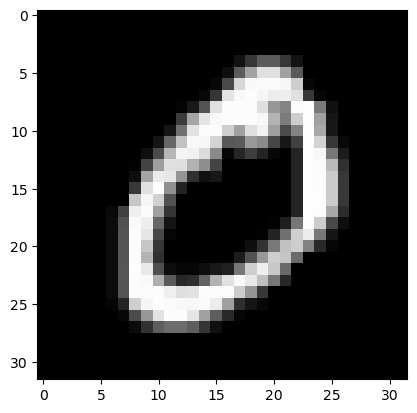

In [5]:
# Install OpenCV library to process images.
# !pip3 install opencv-python

### Resize an image
X_train_rgb = []
for i in range(len(X_train)):
    rgb = to_rgb(X_train[i])
    X_train_rgb.append(rgb)

X_test_rgb = []
for i in range(len(X_test)):
    rgb = to_rgb(X_test[i])
    X_test_rgb.append(rgb)

# Show an image
plt.imshow(X_train_rgb[1])
plt.show()

In [6]:
X_train = np.squeeze(np.stack([X_train_rgb],axis=4), axis=4)/255.0
X_test = np.squeeze(np.stack([X_test_rgb],axis=4), axis=4)/255.0

In [7]:
# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Val shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (54000, 32, 32, 3), y_train = (54000,)
Val shape: X_val = (6000, 32, 32, 3), y_val = (6000,)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000,)


## Build VGG16 Model

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [9]:
VGG16 = Sequential(name='VGG16')

# Block 1: 2X Conv + MaxPooling
VGG16.add(Conv2D(filters=64, input_shape=(32,32,3), kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_1_Conv1')) #Conv2D
VGG16.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_1_Conv2')) #Conv2D
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_1_MaxPool')) #MaxPooling2D

# Block 2: 2X Conv + MaxPooling
VGG16.add(Conv2D(filters=128, input_shape=(16,16,64), kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_2_Conv1')) #Conv2D
VGG16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_2_Conv2')) #Conv2D
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_2_MaxPool')) #MaxPooling2D

# Block 3: 2X Conv + MaxPooling
VGG16.add(Conv2D(filters=256, input_shape=(8,8,256), kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_3_Conv1')) #Conv2D
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_3_Conv2')) #Conv2D
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_3_MaxPool')) #MaxPooling2D

# Block 4: 3X Conv + MaxPooling
VGG16.add(Conv2D(filters=512, input_shape=(4,4,512), kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_4_Conv1')) #Conv2D
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_4_Conv2')) #Conv2D
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_4_Conv3')) #Conv2D
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_4_MaxPool')) #MaxPooling2D

# Block 5: 3X Conv + MaxPooling
VGG16.add(Conv2D(filters=512, input_shape=(2,2,512), kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_5_Conv1')) #Conv2D
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_5_Conv2')) #Conv2D
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", name='Block_5_Conv3')) #Conv2D
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_5_MaxPool')) #MaxPooling2D

# Flatten
VGG16.add(Flatten())

# Fully connected (FC) layer 1
VGG16.add(Dense(units=4096, activation="relu"))
VGG16.add(Dropout(rate=0.4)) # Dropout with drop rate

# Fully connected (FC) layer 2
VGG16.add(Dense(units=4096, activation="relu"))
VGG16.add(BatchNormalization())
VGG16.add(Dropout(rate=0.4)) # Dropout with drop rate

# Fully connected (FC) layer 1
VGG16.add(Dense(units=1000, activation="relu"))
VGG16.add(BatchNormalization())
VGG16.add(Dropout(rate=0.4)) # Dropout with drop rate

# Fully connected (FC) layer 3
VGG16.add(Dense(units=10, activation="softmax")) # Number of output classes: 10 number from 0 -> 9

#Model Summary
VGG16.summary()

2023-03-30 17:36:54.340858: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 17:36:54.370477: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 17:36:54.370674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 17:36:54.371190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operation

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Block_1_Conv1 (Conv2D)      (None, 32, 32, 64)        1792      
                                                                 
 Block_1_Conv2 (Conv2D)      (None, 32, 32, 64)        36928     
                                                                 
 Block_1_MaxPool (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 Block_2_Conv1 (Conv2D)      (None, 16, 16, 128)       73856     
                                                                 
 Block_2_Conv2 (Conv2D)      (None, 16, 16, 128)       147584    
                                                                 
 Block_2_MaxPool (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                         

In [10]:
# Compile the model
VGG16.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy']) # Define initial learning rate and metrics.

## Train

In [11]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9846504719814566011
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2737963008
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1625153251507218665
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


2023-03-30 17:37:01.494055: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 17:37:01.494349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 17:37:01.494492: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 17:37:01.494722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 17:37:01.494936: I tensorflow/compiler/xla/stream_executo

In [14]:
tf.debugging.set_log_device_placement(True)

In [12]:
mc = keras.callbacks.ModelCheckpoint(filepath="epoch-{epoch:02d}.hdf5", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Train the model. Using Colab for training
history = VGG16.fit(X_train, y_train, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=20, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training

2023-03-30 17:37:15.861599: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 663552000 exceeds 10% of free system memory.
2023-03-30 17:37:16.416905: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 663552000 exceeds 10% of free system memory.


Epoch 1/20


2023-03-30 17:37:18.902947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-30 17:37:20.463721: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-30 17:37:20.464431: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-30 17:37:20.857362: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

106/106 [==============================] - 81s 551ms/step - loss: 0.4996 - accuracy: 0.8297 - val_loss: 2.2519 - val_accuracy: 0.7730
Epoch 2/20
106/106 [==============================] - 45s 420ms/step - loss: 0.0626 - accuracy: 0.9804 - val_loss: 2.1396 - val_accuracy: 0.8435
Epoch 3/20
106/106 [==============================] - 45s 422ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 1.8189 - val_accuracy: 0.9043
Epoch 4/20
106/106 [==============================] - 45s 423ms/step - loss: 0.0378 - accuracy: 0.9882 - val_loss: 1.1228 - val_accuracy: 0.9828
Epoch 5/20
106/106 [==============================] - 45s 423ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.2864 - val_accuracy: 0.9825
Epoch 6/20
106/106 [==============================] - 45s 423ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0864 - val_accuracy: 0.9803
Epoch 7/20
106/106 [==============================] - 45s 424ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0693 - val_accuracy: 0.9

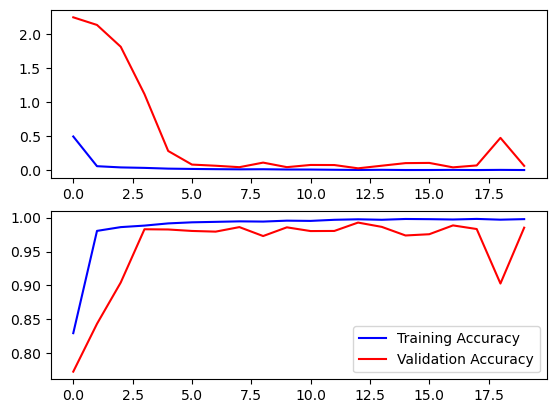

In [13]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [16]:
# Let us load a saved model and evaluate its performance on the test set
model = tf.keras.models.load_model("/home/hoangan/Documents/Code/python_project/spring_22_23/deep_learning/Assignment-1-DeepLearning/ML4DS-200011-Assignment1/epoch-13.hdf5")
result = VGG16.evaluate(X_test, y_test) # If unspecified, batch_size will default to 32

2023-03-30 17:55:15.892783: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.
2023-03-30 17:55:16.020895: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 6s 17ms/step - loss: 0.0769 - accuracy: 0.9837


In [17]:
# Show the model performance
print(VGG16.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in AlexNet.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.07688332349061966, accuracy = 0.9836999773979187


1/1 [==============================] - 1s 608ms/step
Prediction Number: 2


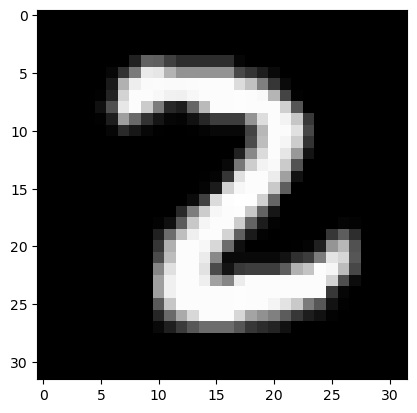

In [18]:
pic_number = 2108
pred = VGG16.predict(X_test[pic_number:pic_number+1])
print("Prediction Number:", np.argmax(pred, axis=1)[0])
plt.imshow(X_test[pic_number])
plt.show()